# Part II - Loan Data from Prosper Presentation 
## by Avwunu Onaroghene

## Investigation Overview
>The main feature of interest is the LoanStatus. I am looking to see how select variables affect a loan’s outcome status.
The visualization here will depict the relationship between LoanStatus and the select variables. 


> ● Distribution of LoanStatus - more than half of the listings are still paying off their loans, but of remainder, most have completed payment.

> ● Distribution of LoanStatus and Homeownership - Home owners are more likely to take loans and complete their loan payments.

> ● Distribution of LoanStatus and ProsperScore - Listings with a Prosper Score of 4 are mostly under the 'current' loan status category and listings with a score of 8 have more completed payments. Listings with higher risk (higher ProsperScore) are     more likely to have completed loan payments.

> ● Distribution of LoanStatus and Employment Status - People who are employed take more loans and are more likely to complete their loan payments.

> ● Distribution of LoanStatus and LoanOriginalAmount - Although listings under 10,000 with 'completed' as LoanStatus, it is not a clear indication that lower LoanOriginalAmount are more like to get paid off




## Dataset Overview

> After wrangling, the data set contains 33,930 loans from July 2009 and 16 select variables on each loan, including;

1) LoanStatus
2) ProsperScore
3) ListingCategory (numeric)
4) BorrowerState
5) EmploymentStatus
6) EmploymentStatusDuration
7) IsBorrowerHomeowner
8) CreditScoreRangeLower
9) CreditScoreRangeUpper
10) AvailableBankcardCredit
11) StatedMonthlyIncome
12) LoanOriginalAmount
13) LoanOriginationQuarter
14) MonthlyLoanPayment
15) ListingNumber              
16) ListingCreationDate 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import csv

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan=pd.read_csv('prosperLoanData.csv', sep='","', engine='python', quoting=csv.QUOTE_NONE)
pd.options.display.max_columns = None

LoanCopy = loan.copy (deep=True)

#dropping rows with loans taken before July 2009
loan.drop (loan [loan.ProsperScore.isnull()].index, inplace=True)

#dropping with more than 90% of missing values
max_number_of_nulls = 3000
loan= loan.loc[:, (loan.isnull().sum(axis=0) <= max_number_of_nulls)]

#selecting only the rows of interest 
loan =loan.iloc[:, [1,2,4,13,14,15,17,18,19,22,23,39,46,51,53,55]]

loan.head ()

,ListingNumber,ListingCreationDate,LoanStatus,ProsperScore,ListingCategory (numeric),BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,AvailableBankcardCredit,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment
1,1209647,2014-02-27 08:28:07.900000000,Current,7.0,2,CO,Employed,44.0,False,680.0,699.0,10266.0,6125.000000,10000.0,Q1 2014,318.93
3,658116,2012-10-22 11:02:35.010000000,Current,9.0,16,GA,Employed,113.0,True,800.0,819.0,30754.0,2875.000000,10000.0,Q4 2012,321.45
4,909464,2013-09-14 18:38:39.097000000,Current,4.0,2,MN,Employed,44.0,True,680.0,699.0,695.0,9583.333333,15000.0,Q3 2013,563.97
5,1074836,2013-12-14 08:26:37.093000000,Current,10.0,1,NM,Employed,82.0,True,740.0,759.0,86509.0,8333.333333,15000.0,Q4 2013,342.37
6,750899,2013-04-12 09:52:56.147000000,Current,2.0,1,KS,Employed,172.0,False,680.0,699.0,1929.0,2083.333333,3000.0,Q2 2013,122.67


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Distribution of LoanStatus - more than half of the listings are still paying off their loans, but of remainder, most have completed payment.
Exploring the main feature of interest.


Text(0.5,0,'Count')

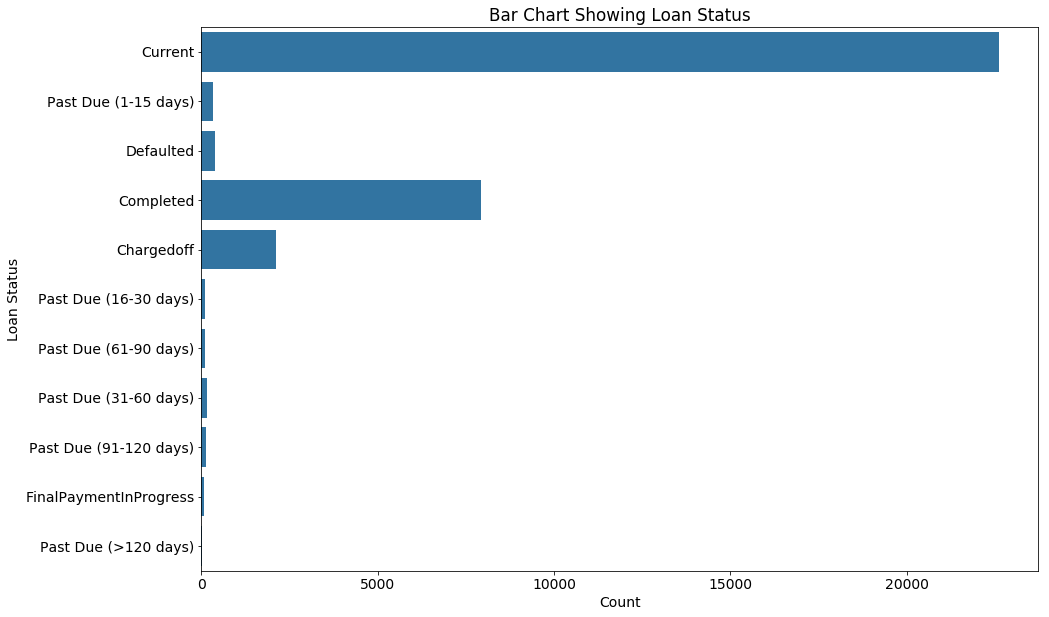

In [3]:
base_color = sb.color_palette()[0]
plt.rcParams ['figure.figsize'] = (15,10)
plt.rcParams.update({'font.size': 14})
sb.countplot(data=loan, y='LoanStatus', color=base_color);

# Labeling the axes
plt.title ('Bar Chart Showing Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Count')


## (Visualization 2)

> Distribution of LoanStatus and Homeownership - Home owners are more likely to take loans and complete their loan payments.

Text(0.5,1,'Clustered Bar Chart Showing Loan Status & Homeownership')

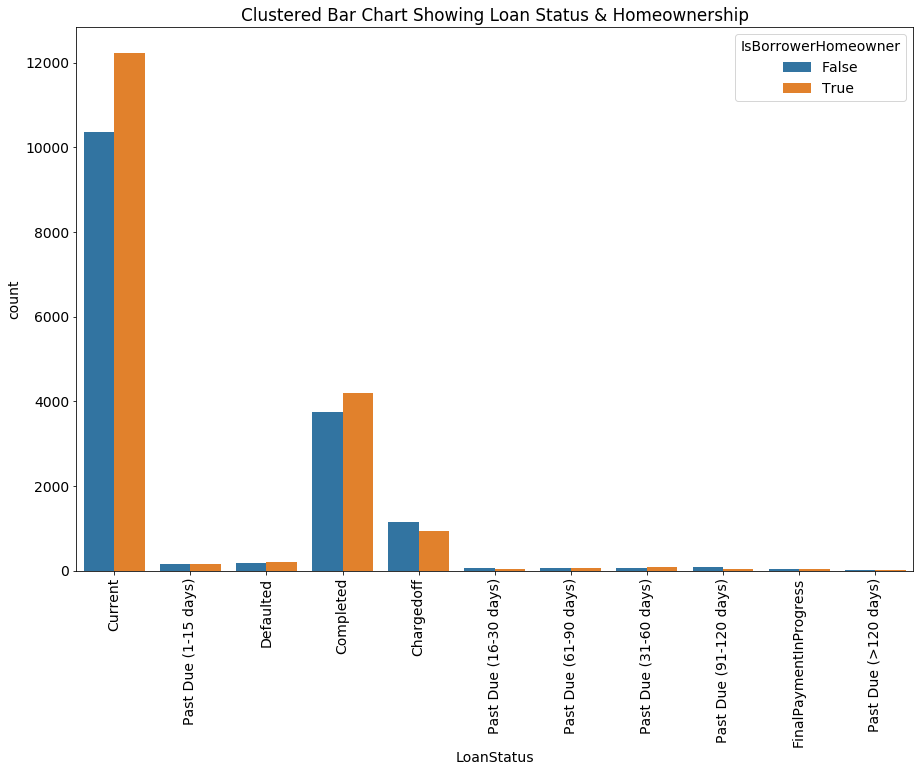

In [4]:
sb.countplot(data = loan, x = 'LoanStatus', hue = 'IsBorrowerHomeowner')

plt.xticks(rotation=90);
plt.title ('Clustered Bar Chart Showing Loan Status & Homeownership')

## (Visualization 3)
>Distribution of LoanStatus and ProsperScore - Listings with a Prosper Score of 4 are mostly under the 'current' loan status category and listings with a score of 8 have more completed payments. Listings with higher risk (higher ProsperScore) are     more likely to have completed loan payments.


Text(5,1500,'1 being of lowest risk and 11 being highest risk ')

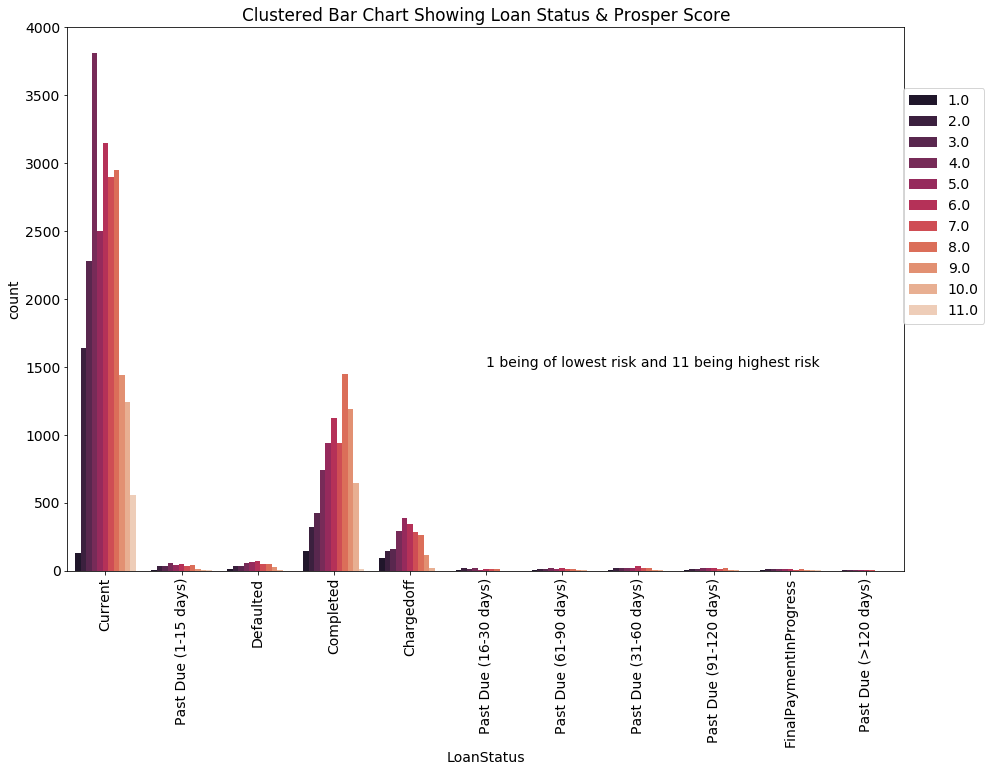

In [5]:
sb.countplot(data = loan, x = 'LoanStatus', hue = 'ProsperScore',palette= sb.color_palette('rocket',11) )

plt.xticks(rotation=90);
plt.title ('Clustered Bar Chart Showing Loan Status & Prosper Score')
plt.legend(frameon=True, bbox_to_anchor = (0.99, 0.9))
plt.text (5,1500, '1 being of lowest risk and 11 being highest risk ')

## (Visualization 4)
>Distribution of LoanStatus and Employment Status - People who are employed take more loans and are more likely to complete their loan payments.

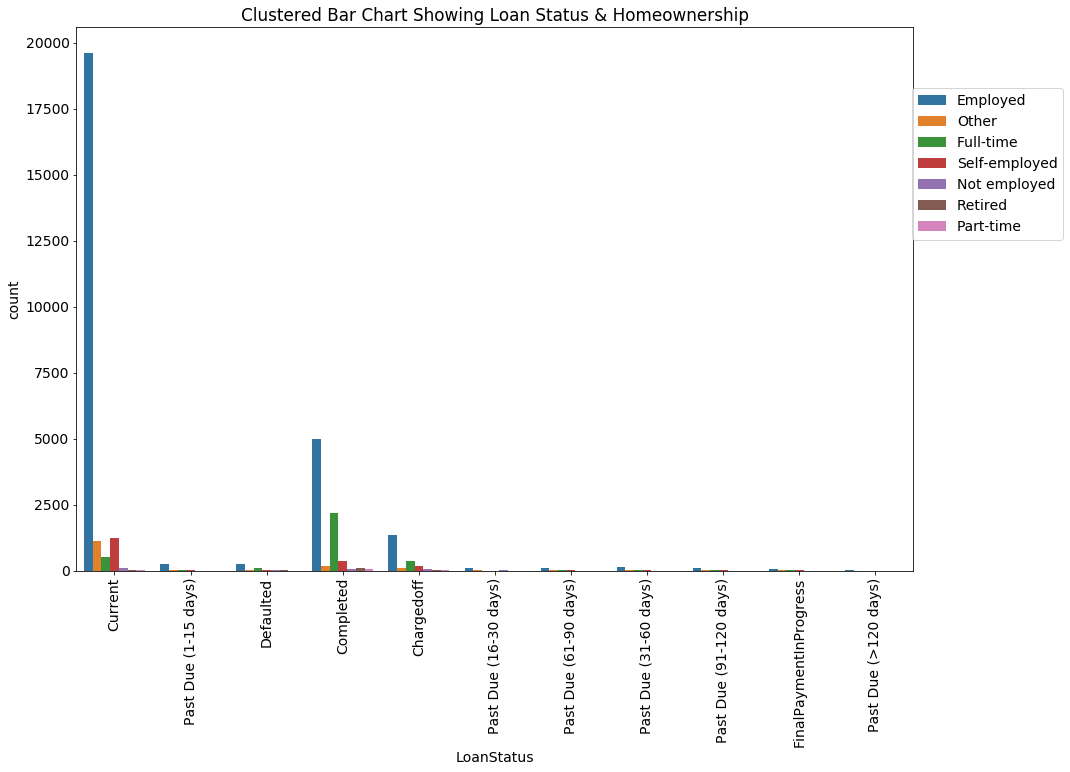

In [6]:
sb.countplot(data = loan, x = 'LoanStatus', hue = 'EmploymentStatus')

plt.xticks(rotation=90);
plt.title ('Clustered Bar Chart Showing Loan Status & Homeownership')
plt.legend(frameon=True, bbox_to_anchor = (0.99, 0.9))


## (Visualization 5)
>Distribution of LoanStatus and LoanOriginalAmount - Although listings under 10,000 with 'completed' as LoanStatus, it is not a clear indication that lower LoanOriginalAmount are more like to get paid off

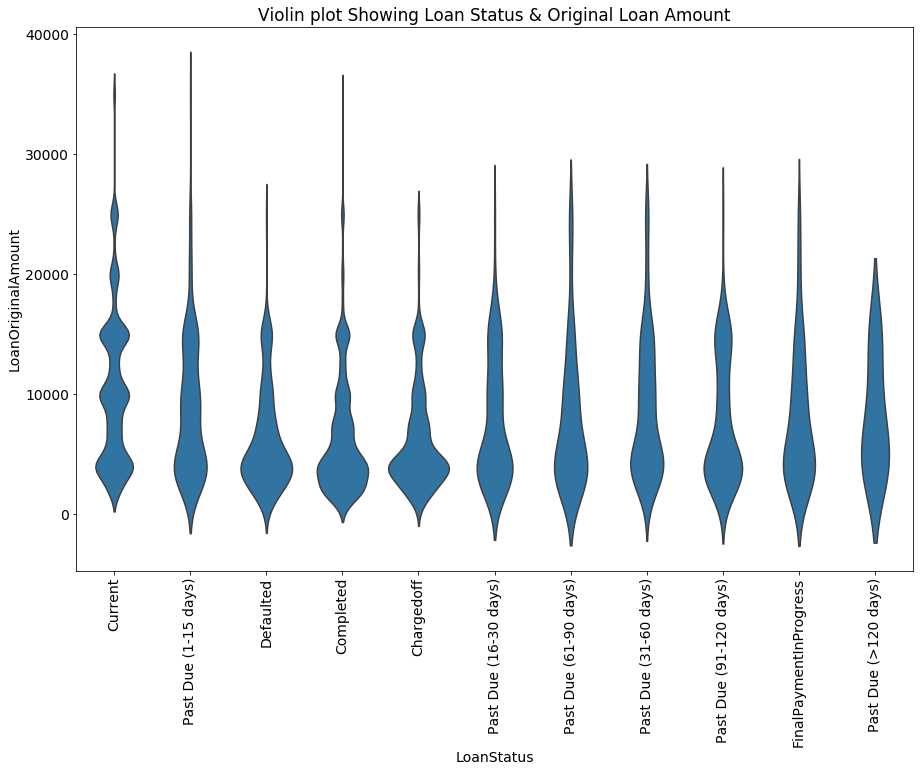

In [7]:
sb.violinplot(data=loan, x='LoanStatus', y='LoanOriginalAmount', color=base_color, inner=None)
plt.xticks (rotation=90);
plt.title ('Violin plot Showing Loan Status & Original Loan Amount')
plt.figure(figsize=(8,6))

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Loan_Data_from_Prosper_Presentation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Loan_Data_from_Prosper_Presentation.ipynb to slides
[NbConvertApp] Writing 616291 bytes to Part_II_Loan_Data_from_Prosper_Presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Loan_Data_from_Prosper_Presentation.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chr